In [1]:
from pathlib import Path
from tempfile import TemporaryDirectory

import numpy as np
import matplotlib.pyplot as plt
import flopy
import pandas as pd
import shutil
import flopy.utils.binaryfile as bf
import os

In [2]:
folder = Path('C:\\Users\\swan47\\Documents\\Data\\_wasaga_2d')

In [3]:
model_ws = Path('C:\\Users\\swan47\\AppData\\Local\\Temp\\_T1029174006_wasaga_g_c1clv5')
model = flopy.modflow.Modflow.load('wasaga.nam', model_ws=model_ws)

FileNotFoundError: cannot find name file: /Users/b/Documents/GitHub/wasaga_model/wasaga_2d/C:\Users\swan47\AppData\Local\Temp\_T1029174006_wasaga_g_c1clv5/wasaga.nam

In [26]:
dis = model.dis
nrow = dis.nrow
ncol = dis.ncol
nlay = dis.nlay

nper = model.dis.nper

In [17]:
delv = np.array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.25, 0.25, 0.25,
       0.25, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

delr = np.concatenate([np.repeat(2,25),np.repeat(1,70),np.repeat(2,15)])

c:\Users\swan47\Miniconda3\envs\flopy_env\lib\site-packages\flopy\plot\crosssection.py:561: UserWarning: Warning: converting a masked element to nan.
  plotarray = np.array([a[cell] for cell in sorted(self.projpts)])


Text(0, 0.5, 'Elevation (m.a.s.l)')

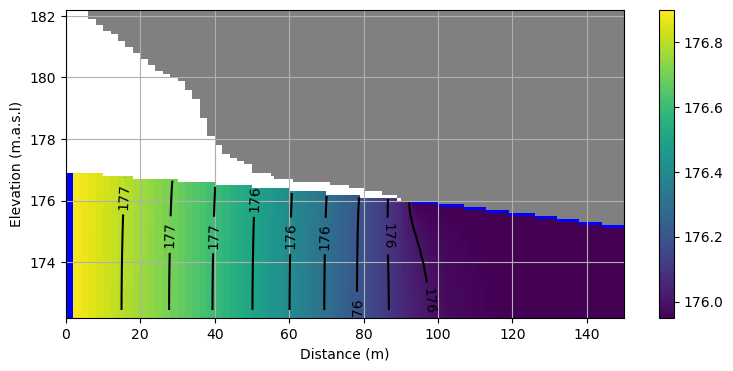

In [5]:
fig = plt.figure(figsize=(9, 4))
xsect = flopy.plot.PlotCrossSection(model=model, line={"Row": 0})

hds = flopy.utils.binaryfile.HeadFile(Path(model_ws) /  'wasaga.hds')
head_data = hds.get_data(kstpkper=(0, 0)) # (time step, stress period)

ibd = model.bas6.ibound.array
masked_head_data = np.ma.masked_where(ibd== 0, head_data)

cs = xsect.plot_array(masked_head_data, cmap="viridis")
plt.colorbar(cs)

contour_levels = np.arange(175,178, 0.1)
contour_set = xsect.contour_array(masked_head_data, levels=contour_levels, colors="black")
plt.clabel(contour_set, inline=True, fontsize=10, fmt="%1.0f")
plt.grid()

ibd = xsect.plot_ibound(color_noflow='grey')
#ibd.set_facecolor("red")  # set the color of the masked cells to grey


#xs = drn_ys
#ys = [ lay_to_meter(locate_ground_surface_lay(meter_to_row(y))) for y in drn_ys]
#plt.scatter([x - 0.0 for x in xs],[y- 0.0 for y in ys],c='r',marker='s',s=5)
plt.xlabel('Distance (m)')
plt.ylabel('Elevation (m.a.s.l)')


In [23]:
def plot_distance_mass(workspace,name,model):


    ucnobj = bf.UcnFile(Path(workspace) / "MT3D001.UCN", model=model)
    times = ucnobj.get_times()

    for per in [-1,-2,-3]:
        concentration = ucnobj.get_data(totim=times[per])
        concentration[concentration==1e30]=0

        distances = [50,60,70,80,90]
        vsums = []
        for dis in distances:
            col = delr.cumsum().tolist().index(dis)
            vsum = (concentration[:,0,col]*delv).sum()*60
            vsums.append(vsum)


        plt.plot(np.array(distances)-30,vsums,marker='o',alpha=0.8,label='{} days'.format(times[per]))
    plt.ylabel('SRP Mass')
    plt.xlabel('Distance from Septic Bed (m)')
    plt.ylim(0,15000)
    plt.xlim(0)

    plt.legend()
    plt.gcf().set_size_inches(4,3)
    plt.tight_layout()
    plt.show()

    plt.savefig(Path(workspace) /'_output/SRP_mass.png')
    plt.close()

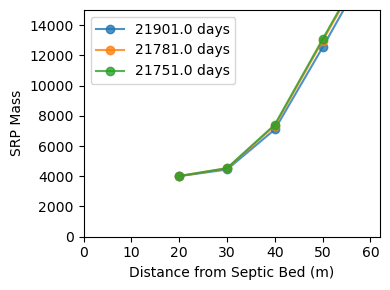

In [24]:
plot_distance_mass(model_ws,'wasaga',model)